**Общая информация**

**Срок сдачи:** 21 октября 2020, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [499]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [2694]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import sklearn as sk
from scipy.spatial import distance

import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_20newsgroups

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [2445]:
class MyKNeighborsClassifier(BaseEstimator):
    
    def __init__(self, n_neighbors, algorithm='brute'):
        self.number = n_neighbors
        self.algorithm = algorithm
    def fit(self, X, y):
        self.X = np.copy(X)
        self.y = np.copy(y)
    def predict(self, X):
        Xu = np.copy(X)
        ans = np.zeros(len(X),dtype=int)+10
        for i in range(0,len(X)):
            a = np.sqrt(((self.X - Xu[i])**2).sum(axis = 1))
            a = np.vstack((a,self.y))
            a = a[:,np.argsort(a[0,:])]
            a = (a.T[0:self.number:,1])
            ans[i] = int(a[np.argmax(np.unique(a,return_inverse=True, return_counts = True)[2])])
        return ans

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [2354]:
iris = datasets.load_iris()

In [2490]:
a=0
for i in range(500):
    X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, stratify=iris.target)
    
    X_train = (X_train - np.mean(X_train, axis = 0)) / np.std(X_train, axis = 0)
    X_test = (X_test - np.mean(X_train, axis = 0)) / np.std(X_train, axis = 0)
    
    clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
    my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')
    clf.fit(X_train, y_train)
    my_clf.fit(X_train, y_train)
    sklearn_pred = clf.predict(X_test)
    my_clf_pred = my_clf.predict(X_test)
    if accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred )==0:##############
        a+=1;
        
print(a*1/5, '% совпадает')

100.0 % совпадает


**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [2356]:
%time clf.fit(X_train, y_train)

Wall time: 1 ms


KNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [2357]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


In [2358]:
%time clf.predict(X_test)

Wall time: 2.01 ms


array([1, 0, 0, 2, 1, 1, 2, 0, 2, 0, 2, 0, 1, 1, 1])

In [2359]:
%time my_clf.predict(X_test)

Wall time: 1 ms


array([1, 0, 0, 2, 1, 1, 2, 0, 2, 0, 2, 0, 1, 1, 1])

###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [2388]:
class MyKNeighborsClassifier(BaseEstimator):
    
    def __init__(self, n_neighbors, algorithm='brute'):
        self.number = n_neighbors
        self.algorithm = algorithm
    def fit(self, X, y):
        self.X = np.copy(X)
        self.y = np.copy(y)
        
    def predict(self, X):
        if self.algorithm == "brute":
            Xu = np.copy(X)
            ans = np.zeros(len(X),dtype=int)
            for i in range(0,len(X)):
                a = np.sqrt(((self.X - Xu[i])**2).sum(axis = 1))
                a = np.vstack((a,self.y))
                a = a[:,np.argsort(a[0,:])]
                a = (a.T[0:self.number:,1])
                ans[i] = int(a[np.argmax(np.unique(a,return_inverse=True, return_counts = True)[2])])
            return ans
        else:
            ans = np.zeros(len(X),dtype=int)
            tree=sk.neighbors.KDTree(self.X)
            dist, ind = tree.query(X, k=self.number)
            for i in range(len(X)):
                a=self.y[ind[i]]
                ans[i]=a[np.argmax(np.unique(a,return_inverse=True, return_counts = True)[2])]
            return  ans


In [2453]:
a=0
for i in range(500):
    X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.5, stratify=iris.target)
    
    
    
    X_train = (X_train - np.mean(X_train, axis = 0)) / np.std(X_train, axis = 0)
    X_test = (X_test - np.mean(X_train, axis = 0)) / np.std(X_train, axis = 0)
    
    clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
    my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
    clf.fit(X_train, y_train)
    my_clf.fit(X_train, y_train)
    sklearn_pred = clf.predict(X_test)
    my_clf_pred = my_clf.predict(X_test)
    if accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred )==0:####################
        a+=1;
        
print(a*1/5, '% совпадает')


100.0 % совпадает


In [2389]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [2390]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [2391]:
%time clf.fit(X_train, y_train)

Wall time: 992 µs


KNeighborsClassifier(algorithm='kd_tree', n_neighbors=2)

In [2392]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


In [2393]:
%time clf.predict(X_test)

Wall time: 1 ms


array([0, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2, 2, 2, 2, 1])

In [2394]:
%time my_clf.predict(X_test)

Wall time: 976 µs


array([0, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2, 2, 2, 2, 1])

**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [2397]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])


In [2400]:
data = newsgroups['data']
target = newsgroups['target']

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [2852]:
class MyKNeighborsClassifier(BaseEstimator):
    
    def __init__(self, n_neighbors=2, algorithm='brute',metric="euq"):
        self.number = n_neighbors
        self.algorithm = algorithm
        self.metric = metric
    def fit(self, X, y):
        self.X = (X)
        self.y = (y)
        self.X = (self.X - np.mean(self.X, axis = 0)) / np.std(self.X, axis = 0)
        
    def predict(self, X):
        
        if self.algorithm == "brute":
            if self.metric=="euq":
                Xu=X
                Xu = (Xu - np.mean(Xu, axis = 0)) / np.std(Xu, axis = 0)
                ans = np.zeros(len(X),dtype=int)
                a=sk.metrics.pairwise.euclidean_distances(Xu, self.X)
                a = np.argpartition(a,self.number,axis=1)
                a=self.y[a][:,:self.number]
                b=np.unique(a,return_inverse=True)
                b=b[0][np.argmax(np.apply_along_axis(np.bincount, 1, a, None, np.max(b[1]) + 1), axis=1)]
                return b
            elif self.metric=='cos':
                #print("!!!!")
                Xu = X
                Xu = (Xu - np.mean(self.X, axis = 0)) / np.std(self.X, axis = 0)
                ans = np.zeros(len(X),dtype=int)
                a = sk.metrics.pairwise.cosine_distances(Xu, self.X)
                
                '''
                for i in range(0,len(X)):
                    
                    dist = np.vstack((a[i],self.y))
                    dist = dist[:,np.argsort(dist[0,:])]
                    
                    dist = (dist.T[0:self.number:,1])
                    
                    ans[i] = int(dist[np.argmax(np.unique(dist,return_inverse=True, return_counts = True)[2])])
                    
                return ans
                '''
                a = np.argpartition(a,self.number,axis=1)
                a=self.y[a][:,:self.number]
                b=np.unique(a,return_inverse=True)
                b=b[0][np.argmax(np.apply_along_axis(np.bincount, 1, a, None, np.max(b[1]) + 1), axis=1)]
                return b
        else:
            ans = np.zeros(len(X),dtype=int)
            tree=sk.neighbors.KDTree(self.X)
            dist, ind = tree.query(X, k=self.number)
            for i in range(len(X)):
                a=self.y[ind[i]]
                ans[i]=a[np.argmax(np.unique(a,return_inverse=True, return_counts = True)[2])]
            return  ans
        

In [2898]:
def MyMethod(x,y,m,num):
    score = np.zeros(num,dtype=float)
    for i in range(num):
        fold = sk.model_selection.KFold(n_splits=3, shuffle = True)
        test = fold.split(x)
        my_clf = MyKNeighborsClassifier(n_neighbors=i+1, algorithm="brute",metric=m)
        res=[]
        for train_ind, test_ind in test:
            trainX, trainY = x[train_ind], y[train_ind]
            testX, testY = x[test_ind], y[test_ind]
            my_clf.fit(trainX, trainY)
            my_clf_pred = my_clf.predict(testX)
            res.append(accuracy_score(testY, my_clf_pred))       
        score[i]=np.mean(res)
        print(score[i], ' neighbours -', i+1)
    return score

In [2905]:
v=sk.feature_extraction.text.CountVectorizer(data, min_df = 0.01)
matr=  v.fit_transform(data)

matr = matr.toarray()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [2906]:
num=25

In [2907]:
varCosCV = MyMethod(matr,target,'cos',num)###косинус метрика,CountVectorizer
varCosCV

0.24527200522601886  neighbours - 1
0.23483988661961264  neighbours - 2
0.22441191587039525  neighbours - 3
0.2206107914214627  neighbours - 4
0.2272408482100801  neighbours - 5
0.2359026754288158  neighbours - 6
0.2326340936613337  neighbours - 7
0.24465470096574302  neighbours - 8
0.23448895915405835  neighbours - 9
0.23157226565520816  neighbours - 10
0.22945228881571786  neighbours - 11
0.23130750582176363  neighbours - 12
0.2208772619530699  neighbours - 13
0.2187555509811955  neighbours - 14
0.2246766991380612  neighbours - 15
0.2084145446276157  neighbours - 16
0.22441271263392304  neighbours - 17
0.22388166974264256  neighbours - 18
0.22140589111954556  neighbours - 19
0.2191076267235987  neighbours - 20
0.2224654928746375  neighbours - 21
0.2078850952633908  neighbours - 22
0.22900680426679054  neighbours - 23
0.2224673441781286  neighbours - 24
0.2199915655550316  neighbours - 25


array([0.24527201, 0.23483989, 0.22441192, 0.22061079, 0.22724085,
       0.23590268, 0.23263409, 0.2446547 , 0.23448896, 0.23157227,
       0.22945229, 0.23130751, 0.22087726, 0.21875555, 0.2246767 ,
       0.20841454, 0.22441271, 0.22388167, 0.22140589, 0.21910763,
       0.22246549, 0.2078851 , 0.2290068 , 0.22246734, 0.21999157])

In [2908]:
varEuqCV = MyMethod(matr,target,"euq",num)###евклидова метрика,CountVectorizer
varEuqCV

0.20010622263878894  neighbours - 1
0.17633011937673596  neighbours - 2
0.17465075276812056  neighbours - 3
0.1788928623954705  neighbours - 4
0.18808606058458632  neighbours - 5
0.19524387947348743  neighbours - 6
0.19056141739169807  neighbours - 7
0.19170728051578534  neighbours - 8
0.19241536894978784  neighbours - 9
0.18888202734886125  neighbours - 10
0.19604155693592493  neighbours - 11
0.1943605968002539  neighbours - 12
0.19471555495189005  neighbours - 13
0.19135586093158152  neighbours - 14
0.19029684503202474  neighbours - 15
0.19215044507679346  neighbours - 16
0.19003126500083098  neighbours - 17
0.19250530949154396  neighbours - 18
0.1912672561404456  neighbours - 19
0.1894117813579644  neighbours - 20
0.19117822953332433  neighbours - 21
0.186495884622642  neighbours - 22
0.18216395162464302  neighbours - 23
0.18410791402715312  neighbours - 24
0.18914788859071185  neighbours - 25


array([0.20010622, 0.17633012, 0.17465075, 0.17889286, 0.18808606,
       0.19524388, 0.19056142, 0.19170728, 0.19241537, 0.18888203,
       0.19604156, 0.1943606 , 0.19471555, 0.19135586, 0.19029685,
       0.19215045, 0.19003127, 0.19250531, 0.19126726, 0.18941178,
       0.19117823, 0.18649588, 0.18216395, 0.18410791, 0.18914789])

In [2910]:
v2=sk.feature_extraction.text.TfidfVectorizer(data, min_df = 0.01)
matr=  v2.fit_transform(data)
matr = matr.toarray()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [2911]:
varCosTf = MyMethod(matr,target,'cos',num)###косинус метрика,Tfdif
varCosTf
#лучшая

0.3944678036763419  neighbours - 1
0.3654765081772779  neighbours - 2
0.3820913945883259  neighbours - 3
0.3983559393893548  neighbours - 4
0.41497253649856547  neighbours - 5
0.4221315739669797  neighbours - 6
0.42531246487796065  neighbours - 7
0.4305275633780861  neighbours - 8
0.4379530948123289  neighbours - 9
0.4322958394227157  neighbours - 10
0.442548779972252  neighbours - 11
0.4459967038361539  neighbours - 12
0.4418400588142715  neighbours - 13
0.4443177590435239  neighbours - 14
0.44502467576645605  neighbours - 15
0.4474107013215682  neighbours - 16
0.44944305760722164  neighbours - 17
0.44873653926605334  neighbours - 18
0.45288941137828936  neighbours - 19
0.4493540544343218  neighbours - 20
0.45182905972811244  neighbours - 21
0.4504153903217978  neighbours - 22
0.4559838534465038  neighbours - 23
0.4568679094490437  neighbours - 24
0.46110830837823097  neighbours - 25


array([0.3944678 , 0.36547651, 0.38209139, 0.39835594, 0.41497254,
       0.42213157, 0.42531246, 0.43052756, 0.43795309, 0.43229584,
       0.44254878, 0.4459967 , 0.44184006, 0.44431776, 0.44502468,
       0.4474107 , 0.44944306, 0.44873654, 0.45288941, 0.44935405,
       0.45182906, 0.45041539, 0.45598385, 0.45686791, 0.46110831])

In [2912]:
varEuqTf = MyMethod(matr,target,'euq',num)###евклидова метрика,Tfdif
varEuqTf

0.16660693283630287  neighbours - 1
0.10615198461140296  neighbours - 2
0.11613983724839495  neighbours - 3
0.1069473889543641  neighbours - 4
0.10747779912166662  neighbours - 5
0.09810844589024216  neighbours - 6
0.09527974789277138  neighbours - 7
0.09271700487403683  neighbours - 8
0.092275012024099  neighbours - 9
0.09077205823422767  neighbours - 10
0.08794368831585657  neighbours - 11
0.08599974934756786  neighbours - 12
0.08467388796886134  neighbours - 13
0.08608870565202487  neighbours - 14
0.08476246932577587  neighbours - 15
0.0805201722246547  neighbours - 16
0.078840500971161  neighbours - 17
0.0783982034763449  neighbours - 18
0.0781337014193358  neighbours - 19
0.08087299786214285  neighbours - 20
0.07848664422793099  neighbours - 21
0.07689588241045152  neighbours - 22
0.07724973915368152  neighbours - 23
0.07291822797166785  neighbours - 24
0.07477480416255512  neighbours - 25


array([0.16660693, 0.10615198, 0.11613984, 0.10694739, 0.1074778 ,
       0.09810845, 0.09527975, 0.092717  , 0.09227501, 0.09077206,
       0.08794369, 0.08599975, 0.08467389, 0.08608871, 0.08476247,
       0.08052017, 0.0788405 , 0.0783982 , 0.0781337 , 0.080873  ,
       0.07848664, 0.07689588, 0.07724974, 0.07291823, 0.0747748 ])

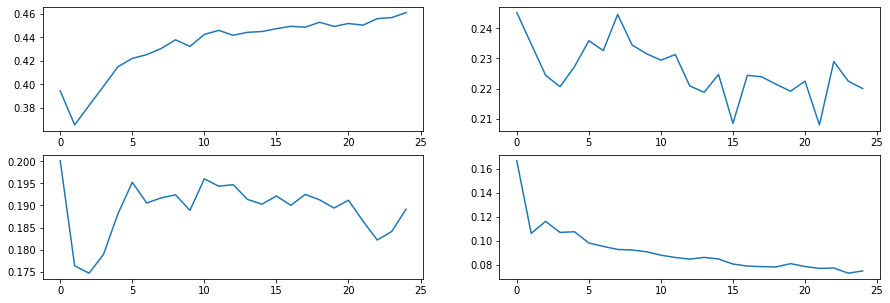

In [2913]:
fig, axes = plt.subplots(2, 2)
fig.set_figheight(5)
fig.set_figwidth(15)
axes[1,1].plot(np.arange(num),varEuqTf )
axes[0,0].plot(np.arange(num),varCosTf )
axes[1,0].plot(np.arange(num),varEuqCV )
axes[0,1].plot(np.arange(num),varCosCV )

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [2918]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])

In [2919]:
data = newsgroups['data']
target = newsgroups['target']

In [2920]:
v2=sk.feature_extraction.text.TfidfVectorizer(data, min_df = 0.01)
matr=  v2.fit_transform(data)
matr = matr.toarray()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [2921]:
varT = MyMethod(matr,target,'cos',num)###косинус метрика,Tfdif
varT,varCosTf


0.38768023617728736  neighbours - 1
0.3487793681242109  neighbours - 2
0.3859529623441717  neighbours - 3
0.3990956127699477  neighbours - 4
0.4042758476250315  neighbours - 5
0.4137027887388452  neighbours - 6
0.41927545360837276  neighbours - 7
0.4257822288438176  neighbours - 8
0.42883498529445213  neighbours - 9
0.42804049962370083  neighbours - 10
0.43693565046861543  neighbours - 11
0.4398552345774211  neighbours - 12
0.440786753424375  neighbours - 13
0.43839631517736305  neighbours - 14
0.44317544636269735  neighbours - 15
0.43534276540459693  neighbours - 16
0.4426455600669141  neighbours - 17
0.4490169416585616  neighbours - 18
0.4451668964656441  neighbours - 19
0.4387942984467281  neighbours - 20
0.4474237921538326  neighbours - 21
0.44728924472030895  neighbours - 22
0.448089442310408  neighbours - 23
0.44941429027022134  neighbours - 24
0.44901826386211424  neighbours - 25


(array([0.38768024, 0.34877937, 0.38595296, 0.39909561, 0.40427585,
        0.41370279, 0.41927545, 0.42578223, 0.42883499, 0.4280405 ,
        0.43693565, 0.43985523, 0.44078675, 0.43839632, 0.44317545,
        0.43534277, 0.44264556, 0.44901694, 0.4451669 , 0.4387943 ,
        0.44742379, 0.44728924, 0.44808944, 0.44941429, 0.44901826]),
 array([0.3944678 , 0.36547651, 0.38209139, 0.39835594, 0.41497254,
        0.42213157, 0.42531246, 0.43052756, 0.43795309, 0.43229584,
        0.44254878, 0.4459967 , 0.44184006, 0.44431776, 0.44502468,
        0.4474107 , 0.44944306, 0.44873654, 0.45288941, 0.44935405,
        0.45182906, 0.45041539, 0.45598385, 0.45686791, 0.46110831]))

In [2922]:
varT-varCosTf

array([-0.00678757, -0.01669714,  0.00386157,  0.00073967, -0.01069669,
       -0.00842879, -0.00603701, -0.00474533, -0.00911811, -0.00425534,
       -0.00561313, -0.00614147, -0.00105331, -0.00592144, -0.00184923,
       -0.01206794, -0.0067975 ,  0.0002804 , -0.00772251, -0.01055976,
       -0.00440527, -0.00312615, -0.00789441, -0.00745362, -0.01209004])

In [2924]:
'похоже'

'похоже'